In [1]:
"""LIS 4369 functions module.  Defines general use functions."""

### CONSTANTS ###
DEV_NAME = "Kyle Hawkins"


### Functions ###
def print_header(title,requirements,developers=(DEV_NAME,)):
    """Takes title string, requirements docstring, and optional
    developers tuple.  Formats and prints the arguments per LIS4369 
    skillsets specification.
    Returns nothing."""
    if(len(developers) > 1):
        prefix="Developers"
        seperator = ", "
        body = seperator.join(developers[:1]) + ", and " + developers[-1]
        print("{}: ".format(prefix) + body)
    elif developers[0] == '':
        pass
    else:
        prefix="Developer"
        body = developers[0]
        print("{}: ".format(prefix) + body)
    
    print(title
    + "\n\nProgram Requirements:"
    + requirements)


### ALIASES ###
# For backwards compatibility.
print_requirements = print_header
get_requirements = print_header

In [2]:
"""Defines six functions:

1. data_analysis_2()"""


### Imports ###
import re
import numpy as np
import pandas as pd
#import pandas_datareader as pdr
import matplotlib.pyplot as plt
from matplotlib import style


### Module configs ###
np.set_printoptions(threshold=np.inf) # print full NumPy array, no ellipsis


### Functions ###
def data_analysis_2():
    pd.set_option('min_rows', 60)
    
    ### Start of demo.py output ###
    url = "https://raw.github.com/vincentarelbundock/Rdatasets/master/csv/Stat2Data/Titanic.csv"
    df = pd.read_csv(url)

    print("***DataFrame composed of three components: index, columns, and data, Data also known as values.***")
    # https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c
    index = df.index
    columns = df.columns
    values = df.values

    print("\nl. Print indexes:")
    print(index)

    print("\n2. Print columns:")
    print(columns)

    # Same as above
    print("\n3. Print columns (another way):")
    print(df.columns[:]) # using slicing notation

    print("\n4. Print (all) values, in array format:")
    print(values)

    print("\n5. ***Print component data types:***")
    print("\na) index type:")
    print(type(index))
    # pandas.core.indexes.range.Rangelndex

    print("\nb) columns type:")
    print(type(columns))
    # pandas.core.indexes.base.Index

    print("\nc) values type:")
    print(type(values))
    # numpy.ndarray

    print("\n6. Print summary of Dataframe (similar to 'describe tablename;' in MySQL):")
    print(df.info())

    print("\n7. First five lines (all columns):")
    print(df.head())

    # https://pandas.pydata.org/ pandas-docs/ stable/generated/ pandas.Dataframe.drop.html
    # Note : 'Unnamed: 0' appears to be used just to number rows
    df = df.drop('Unnamed: 0',1) # drop column 'Unnamed: 0'
    print("\n8 Print summary of DataFrame (after dropping column 'Unnamed: 0').")
    print(df.info())

    print("\n9. First five lines (after droppmg column 'Unnamed: 0'):")
    print(df.head())

    # Precise data selection (data slicing):
    # Questions? Do some research! https://medium.com/ dunder-data/ selecting-subsets•of-data-in •pandas•6fcd0170be9c
    # Note: contolled/ precise data selection (data slicing)
    # 1) Dataframe.loc gets rows {or columns} with particular labels (names) from index
    # 2) Data f rame.iloc (stands for integer location) gets rows (or columns) at particular positions in index (i.e ., only takes integers)
    # .loc/ .iloc accepts same slice notation that Python lists do for both row and columns. Slice notation being start :stop:step
    # .loc includes last value with slice notation, .l loc does •not*--that is , .iloc slice is • • ~exclusive•• -- of last integer!

    print("\n***Precise data selection (data slicing):***")
    print("\n10. Using iloc, return first 3 rows:")
    print(df.iloc[:3])
    # print(df.iloc[0 :3:1]) # equivalent to above {slice notation"" start:stop :step)

    print("\nll. Using iloc, return last 3 rows (start on index 1310 to end):")
    print(df.iloc[1310:])

    # select rows and columns simultaneously
    # separate row and column with comma
    # example : df.iloc[row_index, column_index]

    print("\n12. Select rows 1, 3, and 5; and columns 2, 4, and 6 (includes index column):")
    a = df.iloc[[0,2,4],[1,3,5]]
    print(a)

    print("\n13. Select all rows; and columns 2, 4, and 6 (includes index column):")
    a = df.iloc[:,[1,3,5]]
    print(a)

    print("\n14. Select rows 1, 3, and 5; and all columns (includes index column):")
    a = df.iloc[[0,2,4],:]
    print(a)
    # same as above
    # a = df.iloc[[0, 2, 4]] # Note : leaving out colon selects all columns as well
    # print(a)

    print("\n15. Select all rows, and all columns (includes index column). Note: only first and last 30 records displayed:")
    a = df.iloc[:,:]
    print(a)

    print("\n16. Select all rows, and all columns, starting at column 2 (includes index column) . Note: only first and last 30 records displayed:")
    a = df.iloc[:,1:]
    print(a)

    print("\n17. Select row 1, and column 1, (includes index column):")
    # Note: .iloc does *not* contain last index value--here, should have included 1!
    a = df.iloc[0:1,0:1]
    print(a)

    print("\n18. Select rows 3-5, and columns 3-5, (includes index column):")
    # Note: .iloc does *not* contam last index value--here, should have Included 5!
    a = df.iloc[2:5,2:5]
    print(a)

    print("\n19.***Convert pandas DataFrame df to NumPy ndarray, use values command:***")
    # Select all rows, and all columns, starting at column 2:
    b = df.iloc[:, 1:].values # ndarray = N-dimensional array (rows and columns)

    print("\n20. Print data frame type:")
    print(type(df))

    print("\n21. Print a type:")
    print(type(a))

    print("\n22. Print b type:")
    print(type(b))

    print("\n23. Print number or dimensions and Items in array (rows, columns). Remember: starting at column 2:")
    print(b.shape)

    print("\n24. Print type of Items in array. Remember: ndarray is an array of arrays. Each record/item Is an array.")
    print(b.dtype)

    print("\n25. Printing a:")
    print(a)

    print("\n26. Length a:")
    print(len(a))

    print("\n27. Printing b:")
    print(b)

    print("\n28. Length b:")
    print(len(b))

    # Print element or ndarray b In *second* row, *third* column
    print("\n29. Print element of (NumPy array) ndarray b in *second* row, *third* column:")
    print(b[1,2])

    # Print full NumPy array, no ellipsis: here is why np.set printoptions(threshold=np.inf) is set at top of file
    print("\n30. Print all records for NumPy array column 2:")
    print(b[:,1])

    print("\n31. Get passenger names:")
    names = df["Name"]
    print(names)

    print("\n32. Find all passengers with name 'Allison' (using regular expressions):")
    # Note: 'r' obviates the need for an escape sequence. For example: \'(Alllson)\'
    # See: https://docs.python.org/2/llbrary/re.html

    #for name in names:
    #    print(re.search(r'(Allison)', name))

    # Note: there are various ways of retrieving data

    # Note: print full OataFrame, w/no ellipsis
    # will automatically return options to thelr default values
    # with pd.option_context('dlsplay.max rows', None):
    # prlot{df} # print entire dataframe

    print( "\n***33. Statistlcal Analysis (DataFrame notation):***")
    # difference between np.mean and np.average: average takes optional weight parameter. If not supplled they are equivalent.
    print("\na) Print mean age:")
    avg = df["Age"].mean() # second column
    print(avg)

    print("\nb) Print mean age, rounded to two decimal places:" )
    avg = df["Age"].mean() # will •not• display last 0
    avg = round(avg,2)
    print("{:,.2f}".format(avg))

    print("\nc) Print mean of every column In DataFrame (may not be suitable with certain columns):")
    avg_all = df.mean(axis=0) # mean every column
    # avg_all = df.mean(axis=l) # mean every row
    print(avg_all)

    print("\nd) Print summary statistics (DataFrame notation):")
    # returns three quartiles, mean, count, min/max values, and standard deviation
    describe = df["Age"].describe() # second column
    # describe = df["Age"].describe(percentlles=[.10, .20, .SO, .80]) # choose different percentiles
    print(describe)

    print("\ne) Print minimum age (DataFrame notation):")
    # can also do functions separately
    min = df["Age"].min() # second column
    print(min)

    print("\nf) Print maximum age (DataFrame notation):")
    max = df["Age"].max() # second column
    print(max)

    print("\ng) Print median age (DataFrame notation):")
    median = df["Age"].median() # second column
    print(median)

    print("\nh) Print mode age (DataFrame notation):")
    mode = df["Age"].mode() # second column
    print(mode)

    print("\nm) Print number of values (DataFrame notation):")
    count = df["Age"].count() # second column
    print(count)

    print("\n***Graph: Display ages of the first 20 passengers (use code from previous assignment):***")
    ### End of demo.py output ###


    # Graphing
    #style.use('fivethirtyeight')
    style.use('ggplot')

    #print(df['Age'][:20])
    df['Age'][:20].plot()
    plt.legend()
    plt.show()

Data Analysis 2

Program Requirements:
1. Run demo.py.
2. If errors, more than likely missing installations.
3. Test Python Package Installer: pip freeze
4. Research how to install any missing packages:
5. Create at least three functions that are called by the program:
    a. main(): calls at least two other functions.
    b. get_requirements(): displays the program requirements.
    c. data_analysis_2(): displays results as per demo.py.
6. Display graph as per instructions w/in demo.py.
***DataFrame composed of three components: index, columns, and data, Data also known as values.***

l. Print indexes:
RangeIndex(start=0, stop=1313, step=1)

2. Print columns:
Index(['Unnamed: 0', 'Name', 'PClass', 'Age', 'Sex', 'Survived', 'SexCode'], dtype='object')

3. Print columns (another way):
Index(['Unnamed: 0', 'Name', 'PClass', 'Age', 'Sex', 'Survived', 'SexCode'], dtype='object')

4. Print (all) values, in array format:
[[1 'Allen, Miss Elisabeth Walton' '1st' 29.0 'female' 1 1]
 [2 'Alliso

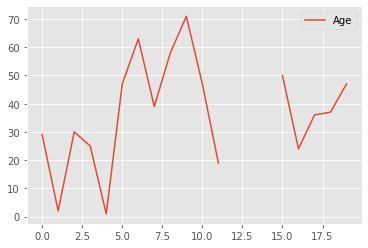

In [3]:
"""Assignment 4 - Data Analysis 2"""
# Developer: Kyle Hawkins

# Course: LIS4369

# Semester: Fall 2020

import functions as f
import general_functions as gf


TITLE = "Data Analysis 2"
REQUIREMENTS = """
1. Run demo.py.
2. If errors, more than likely missing installations.
3. Test Python Package Installer: pip freeze
4. Research how to install any missing packages:
5. Create at least three functions that are called by the program:
    a. main(): calls at least two other functions.
    b. get_requirements(): displays the program requirements.
    c. data_analysis_2(): displays results as per demo.py.
6. Display graph as per instructions w/in demo.py."""

def main():
    # Print Title and requirements.
    gf.get_requirements(TITLE,REQUIREMENTS,('',))
    
    # This function does the rest
    f.data_analysis_2()


if __name__ == '__main__':
    main()